In [1]:
import pandas as pd
#load in data from Csv
health_data=pd.read_csv(r"C:\Users\SKT\Downloads\Health Dataset Python\Health Dataset Python\Health_dataset.csv",
           )
#Display the firts few rowe
print(health_data.head(3))


  Patient ID  Gender       Disease Treatment               Hospital  \
0  PAT-00001    Male  Tuberculosis  Dialysis  City General Hospital   
1  PAT-00002  Female       Malaria  Dialysis  City General Hospital   
2  PAT-00003  Female       Malaria   Surgery  City General Hospital   

  Admission Date Discharge Date Treatment Status Cause of Death Date of Birth  
0     2022-12-19     2023-01-16        Recovered            NaN    1973-06-05  
1     2023-03-29     2023-04-21        Recovered            NaN    1998-11-21  
2     2022-09-16     2022-10-15        Recovered            NaN    1942-02-14  


In [2]:
#count the number of patients 
total_records =health_data.shape[0]
#what is the total number of patients
print("Total_patients",total_records)

Total_patients 8000


In [3]:
#How is the patient population distribution by gender ?
gender_count=health_data['Gender'].value_counts()
print("Gender Distribution:")
print(gender_count)


Gender Distribution:
Gender
Male      5206
Female    2794
Name: count, dtype: int64


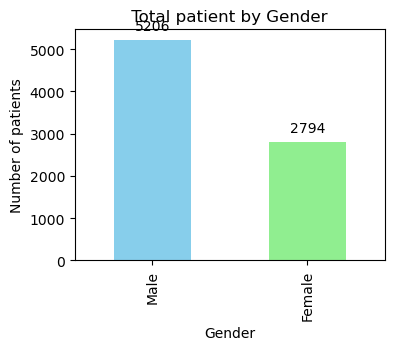

In [4]:
#visulize gender distribution:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
ax=gender_count.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.ylabel("Number of patients")
plt.title(" Total patient by Gender ")

#label part:
for bar in ax.patches:
    height=bar.get_height()
    ax.annotate(
        int(height),
        xy=(bar.get_x()+bar.get_width()/2, height),
    xytext=(0,5),
    textcoords="offset points",
    ha='center',
    va='bottom'
    )


plt.show()

In [5]:
#patients Age-group by total visit

# convert the all date columns in proper date format
health_data['Admission Date']=pd.to_datetime(health_data['Admission Date'])
health_data['Discharge Date']=pd.to_datetime(health_data['Discharge Date'])
health_data['Date of Birth']=pd.to_datetime(health_data['Date of Birth'])

In [6]:
#calculate the patients age as of the time of admission in year
health_data['Age']=(health_data['Admission Date']-health_data['Date of Birth']).dt.days/365.25
health_data['Age']=health_data['Age'].astype(int)
print(health_data['Age'])

0       49
1       24
2       80
3       79
4       43
        ..
7995    96
7996    17
7997    28
7998    24
7999    91
Name: Age, Length: 8000, dtype: int32


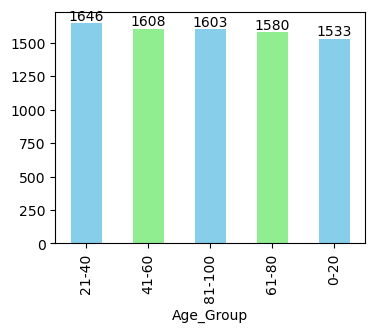

In [7]:
#define the age bins 
bins=[0,20,40,60,80,100]
labels=['0-20','21-40', '41-60', '61-80', '81-100']

#create an age group using the bins var  deffine
health_data['Age_Group']=pd.cut(health_data['Age'], bins=bins,labels= labels, right=False)

#count number of patients in each AGe group
Age_group_count=health_data['Age_Group'].value_counts()

#visulize the age group 
plt.figure(figsize=(4,3))
ax=Age_group_count.plot(kind='bar', color=['skyblue', 'lightgreen'])
ax.bar_label(ax.containers[0])
plt.show()

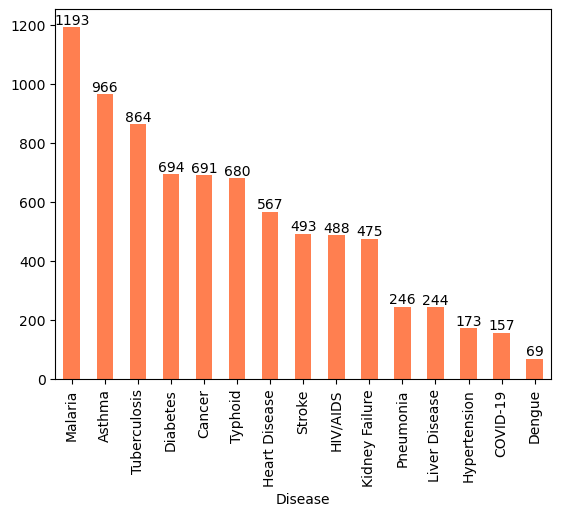

In [8]:
#which disease are most diognosed among the patients
disease_count=health_data['Disease'].value_counts()

ax=disease_count.plot(kind='bar', color=['coral'])
ax.bar_label(ax.containers[0])
plt.show()

In [9]:
disease_count=health_data['Disease'].value_counts().nlargest(3)  # get top 3 disease
disease_count

Disease
Malaria         1193
Asthma           966
Tuberculosis     864
Name: count, dtype: int64

In [10]:
num_disease=3
top3sum=disease_count.sum()
format_value="{:,}".format(top3sum)
print(f"Top {num_disease}  disease diognosed", format_value)


Top 3  disease diognosed 3,023


In [11]:
num_disease=5
disease_count=health_data['Disease'].value_counts().nlargest(5)
top3sum=disease_count.sum()
format_value="{:,}".format(top3sum)
print(f"Top {num_disease}  disease diognosed", format_value)

Top 5  disease diognosed 4,408


In [12]:
#get top 3 desease
disease_count=health_data['Disease'].value_counts().nlargest(3)

Total_disease_count=health_data['Disease'].value_counts().sum()

#calculate percent top 3 disease 
per_3=round((disease_count/Total_disease_count)*100,2)
print(per_3)


Disease
Malaria         14.91
Asthma          12.08
Tuberculosis    10.80
Name: count, dtype: float64


In [13]:
#Are certain disease more prevalent in one gender campared to the other 
gender_disease=pd.crosstab(health_data['Disease'], health_data['Gender'])
print("Disease that are common gender")
print(gender_disease)

Disease that are common gender
Gender          Female  Male
Disease                     
Asthma             320   646
COVID-19            53   104
Cancer             239   452
Dengue              27    42
Diabetes           256   438
HIV/AIDS           155   333
Heart Disease      206   361
Hypertension        65   108
Kidney Failure     182   293
Liver Disease       73   171
Malaria            407   786
Pneumonia           93   153
Stroke             177   316
Tuberculosis       302   562
Typhoid            239   441


In [14]:
#Calculate the duration of each patient stay and create a group to show number of patients in each group
health_data['stay Dration']=(health_data['Discharge Date']-health_data['Admission Date']).dt.days
print(health_data[['Admission Date','Discharge Date','stay Dration']].head(6))

  Admission Date Discharge Date  stay Dration
0     2022-12-19     2023-01-16            28
1     2023-03-29     2023-04-21            23
2     2022-09-16     2022-10-15            29
3     2022-02-07     2022-02-11             4
4     2022-10-25     2022-10-30             5
5     2022-02-07     2022-02-15             8


In [15]:
#group stay duration
bins=[-1,0,3,7,14,float('inf')]
labels=['same day', '1-3 days', '4-7 days', '8-14 days', 'above 21 days']
health_data['stay bucket']=pd.cut(health_data['stay Dration'], bins=bins , labels=labels)
print(health_data['stay bucket'])

0       above 21 days
1       above 21 days
2       above 21 days
3            4-7 days
4            4-7 days
            ...      
7995         4-7 days
7996    above 21 days
7997        8-14 days
7998    above 21 days
7999    above 21 days
Name: stay bucket, Length: 8000, dtype: category
Categories (5, object): ['same day' < '1-3 days' < '4-7 days' < '8-14 days' < 'above 21 days']


In [16]:
#number of patients eac group
number_patients_group=health_data['stay bucket'].value_counts()
number_patients_group

stay bucket
above 21 days    4269
8-14 days        1837
4-7 days         1087
1-3 days          807
same day            0
Name: count, dtype: int64

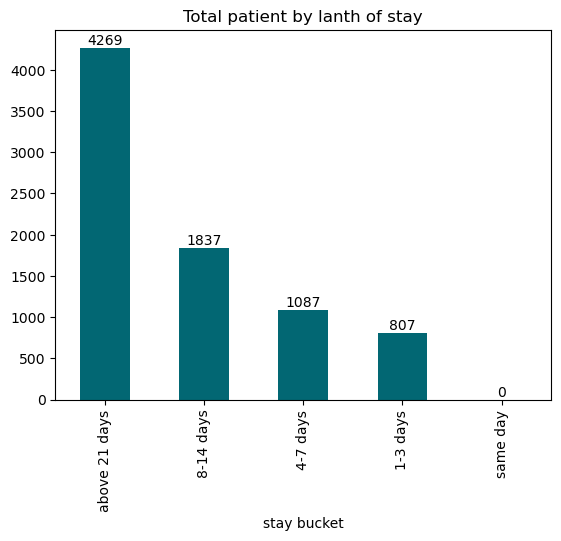

In [17]:
#create chart to visulize it
ax=number_patients_group.plot(kind='bar', color=['#026773'])
plt.title("Total patient by lanth of stay")
ax.bar_label(ax.containers[0])
plt.show()

# for any records with a recorded couse of death  anlyze pattern to identyfy risk factor


In [19]:
#filter records where the cause of death is not empty
death_cause=health_data.dropna(subset='Cause of Death')
cause_count=death_cause['Cause of Death'].value_counts()

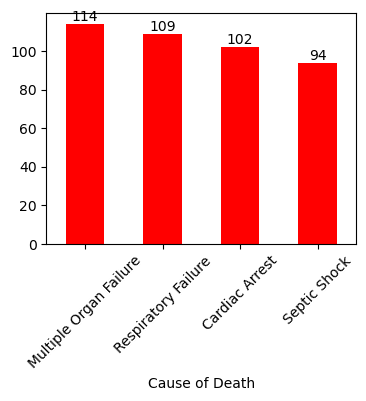

In [20]:
#visulize the chart
plt.figure(figsize=(4,3))
ax=cause_count.plot(kind='bar', color='r')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

#  What are the percentage of the following patients:Deceased under-treament and recovered patienst

In [22]:
#Total patients
total_patients=health_data.shape[0]
total_patients

8000

In [23]:
#Total_death patienst
total_death=(health_data['Treatment Status'].str.lower() =='deceased').sum()
total_death

419

In [24]:
#percentage deceased
death_rate=(total_death/total_patients)*100 if total_death >0 else 0
death_rate

5.2375

# Recovered patients

In [26]:
#Total_death patienst
total_recovere=(health_data['Treatment Status'].str.lower() =='Recovered').sum()
total_recovere

0

In [27]:
#percentage recovere
recovere_rate=(total_recovere/total_patients)*100 if total_death >0 else 0
recovere_rate

0.0

# What are the peak days of the week on a monthly bases for admisions and discharge

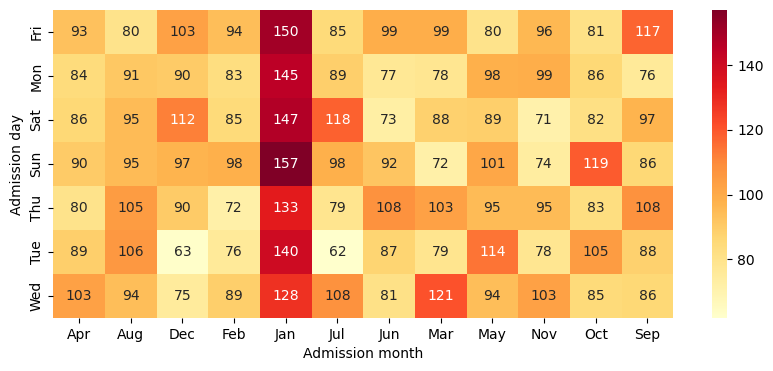

In [101]:
#Extract the short day and month name
health_data['Admission month']=health_data['Admission Date'].dt.strftime('%b')
health_data['Admission day']=health_data['Admission Date'].dt.strftime('%a')
#difine proper order for month and obbreviated days
month_order=['Jan','Feb', 'Mar', 'Apr' ,'May', "Jun", 'July', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
day_order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun']
#create pivotTable 
admission_heatmap=health_data.pivot_table(index='Admission day', columns='Admission month',
                                          aggfunc='size',
                                          fill_value=0)
admission_heatmap
import seaborn as sns
plt.figure(figsize=(10,4))
sns.heatmap(admission_heatmap, annot=True,fmt='d', cmap='YlOrRd' )
plt.show()

# what are the total patients number of patients admitted per week month nad year ? add th filter to filter the month by year

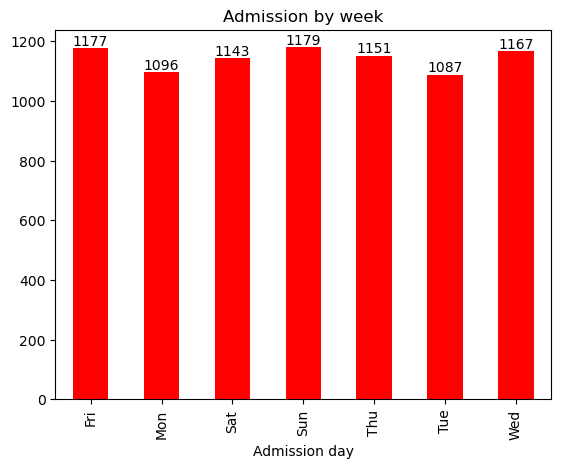

In [141]:
#group the data by the day name and count admission
admission_by_day=health_data.groupby('Admission day').size()
#create_visuale

ax=admission_by_day.plot(kind='bar', color='red' )
plt.title('Admission by week')
ax.bar_label(ax.containers[0])
plt.show()
